<a href="https://colab.research.google.com/github/pksX01/TensorFlow-Examples/blob/master/MovieRating_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import numpy as np

print(tf.__version__)

1.13.1


In [0]:
from google.colab import files
file=files.upload()
movie_init_df = pd.read_csv("movie_metadata.csv")

Saving movie_metadata.csv to movie_metadata.csv


In [0]:
def run_regression(tensor_data,movie_init_df):
    
    def feature_normalize(dataset):
        mu = np.mean(dataset,axis=0)
        sigma = np.std(dataset,axis=0)
        return (dataset - mu)/sigma
    
    def append_bias_reshape(features,labels):
        n_training_samples = features.shape[0]
        n_dim = features.shape[1]
        f = np.reshape(np.c_[np.ones(n_training_samples),features],[n_training_samples,n_dim + 1])
        l = np.reshape(labels,[n_training_samples,1])
        return f, l
    
    features = np.array(tensor_data)
    labels = np.array(movie_init_df['imdb_score'])
    normalized_features = feature_normalize(features)
    f, l = append_bias_reshape(normalized_features,labels)
    n_dim = f.shape[1]
    
    rnd_indices = np.random.rand(len(f)) < 0.80
    
    train_x = f[rnd_indices]
    train_y = l[rnd_indices]
    test_x = f[~rnd_indices]
    test_y = l[~rnd_indices]
    
    learning_rate = 0.01
    training_epochs = 1000
    cost_history = np.empty(shape=[1],dtype=float)
    
    X = tf.placeholder(tf.float32,[None,n_dim])
    Y = tf.placeholder(tf.float32,[None,1])
    W = tf.Variable(tf.ones([n_dim,1]))
    
    init = tf.initialize_all_variables()
    
    
    y_ = tf.matmul(X, W)
    cost = tf.reduce_mean(tf.square(y_ - Y))
    training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    
    sess = tf.Session()
    sess.run(init)
    
    for epoch in range(training_epochs):
        sess.run(training_step,feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,sess.run(cost,feed_dict={X: train_x,Y: train_y}))
        
    plt.plot(range(len(cost_history)),cost_history)
    plt.axis([0,training_epochs,0,np.max(cost_history)])
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.show()
    
    pred_y = sess.run(y_, feed_dict={X: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    print("MSE: %.4f" % sess.run(mse)) 
    
    fig, ax = plt.subplots()
    ax.scatter(test_y, pred_y)
    ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=3)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


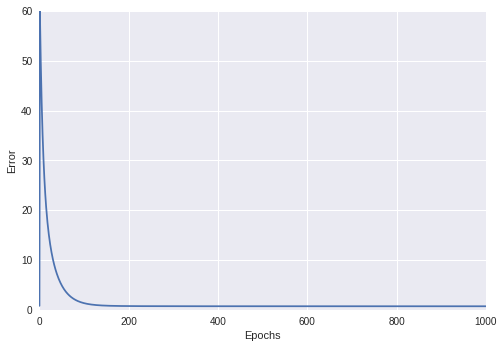

MSE: 0.8081


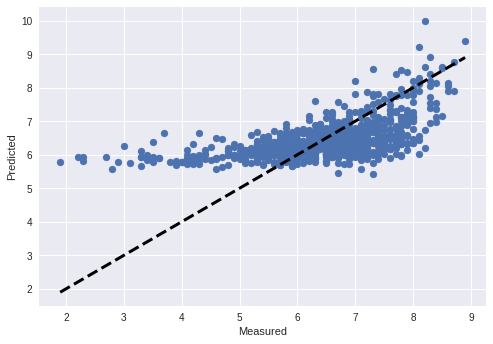

In [0]:

movie_init_df = movie_init_df.dropna()
tensor_data = movie_init_df[['num_critic_for_reviews','duration','director_facebook_likes',
                             'actor_3_facebook_likes','actor_1_facebook_likes',
                             'num_voted_users','cast_total_facebook_likes',
                             'num_user_for_reviews','title_year',
                             'actor_2_facebook_likes','movie_facebook_likes']]
run_regression(tensor_data,movie_init_df)

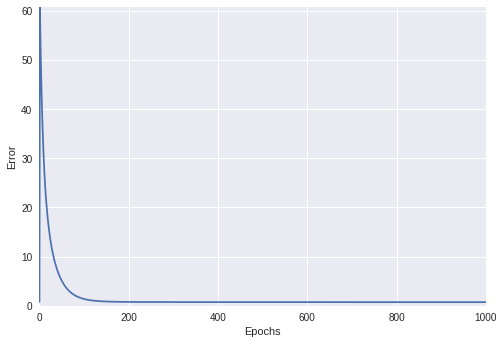

MSE: 0.6599


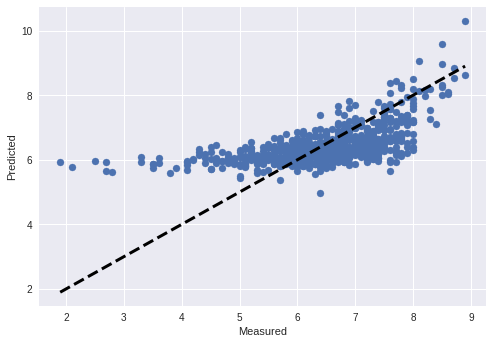

In [0]:
tensor_data_1 = movie_init_df[['num_critic_for_reviews','duration','director_facebook_likes',
                             'actor_3_facebook_likes','actor_1_facebook_likes',
                             'num_voted_users','cast_total_facebook_likes',
                             'num_user_for_reviews','title_year',
                             'actor_2_facebook_likes','movie_facebook_likes','facenumber_in_poster']]
run_regression(tensor_data_1,movie_init_df)